In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import accuracy_score
%matplotlib inline

In [8]:
url_sachet = "C:\\Users\\sach2\\Desktop\\Projects\\insurance\\Insurance_dataset.csv"
url_dhruveel = "C:\\Users\\dhruv\\CS 513 Insurance Project\\Insurance_dataset.csv"
df = pd.read_csv(url_dhruveel,skipinitialspace=True)

In [9]:
df.isna().sum()

customer_ID               0
shopping_pt               0
record_type               0
day                       0
time                      0
state                     0
location                  0
group_size                0
homeowner                 0
car_age                   0
car_value              1531
risk_factor          240418
age_oldest                0
age_youngest              0
married_couple            0
C_previous            18711
duration_previous     18711
A                         0
B                         0
C                         0
D                         0
E                         0
F                         0
G                         0
cost                      0
dtype: int64

In [10]:
df['car_value'] = df['car_value'].fillna(df['car_value'].mode().iloc[0])
df['risk_factor'] = df['risk_factor'].fillna(df['risk_factor'].mode().iloc[0])
df['C_previous'] = df['C_previous'].fillna(df['C_previous'].mode().iloc[0])
df['duration_previous'] = df['duration_previous'].fillna(df['duration_previous'].mode().iloc[0])
df.isna().sum()

customer_ID          0
shopping_pt          0
record_type          0
day                  0
time                 0
state                0
location             0
group_size           0
homeowner            0
car_age              0
car_value            0
risk_factor          0
age_oldest           0
age_youngest         0
married_couple       0
C_previous           0
duration_previous    0
A                    0
B                    0
C                    0
D                    0
E                    0
F                    0
G                    0
cost                 0
dtype: int64

In [11]:
df.count()

customer_ID          665249
shopping_pt          665249
record_type          665249
day                  665249
time                 665249
state                665249
location             665249
group_size           665249
homeowner            665249
car_age              665249
car_value            665249
risk_factor          665249
age_oldest           665249
age_youngest         665249
married_couple       665249
C_previous           665249
duration_previous    665249
A                    665249
B                    665249
C                    665249
D                    665249
E                    665249
F                    665249
G                    665249
cost                 665249
dtype: int64

In [12]:
df.to_csv(r'C:\\Users\\dhruv\\CS 513 Insurance Project\\Clean_Insurance_dataset.csv',index=False)

# Preprocessing the data and Encoding the categorical values

In [13]:
label_encoder = preprocessing.LabelEncoder()
proc_var=df

In [14]:
proc_var.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


In [15]:
proc_var.drop('time',inplace=True,axis=1)


In [16]:
proc_var['state'] = label_encoder.fit_transform(proc_var['state'])
proc_var['location'] = label_encoder.fit_transform(proc_var['location'])
proc_var['car_value'] = label_encoder.fit_transform(proc_var['car_value'])

In [17]:
proc_var.head()

,customer_ID,shopping_pt,record_type,day,state,location,group_size,homeowner,car_age,car_value,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,10,0,2,0,2,6,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,10,0,2,0,2,6,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,10,0,2,0,2,6,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,10,0,2,0,2,6,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,10,0,2,0,2,6,...,1.0,2.0,1,0,2,2,1,2,1,630


In [18]:
proc_var.to_csv(r'C:\\Users\\dhruv\\CS 513 Insurance Project\\Encoded_Insurance_dataset.csv',index=False)

# Normalizing the Data


In [19]:
list(proc_var.columns.values)


['customer_ID',
 'shopping_pt',
 'record_type',
 'day',
 'state',
 'location',
 'group_size',
 'homeowner',
 'car_age',
 'car_value',
 'risk_factor',
 'age_oldest',
 'age_youngest',
 'married_couple',
 'C_previous',
 'duration_previous',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'cost']

In [20]:
names = ['customer_ID','shopping_pt','record_type','day','state','location','group_size','homeowner','car_age','car_value','risk_factor','age_oldest','age_youngest','married_couple','C_previous','duration_previous','A','B','C','D','E','F','G','cost']
normalize_data =  preprocessing.normalize(proc_var, axis=0)
scaled_df = pd.DataFrame(normalize_data, columns=names)
scaled_df.head()

,customer_ID,shopping_pt,record_type,day,state,location,group_size,homeowner,car_age,car_value,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0.001217,0.000253,0.0,0.0,0.000624,0.0,0.00186,0.0,0.000246,0.001589,...,0.00046,0.000327,0.001112,0.0,0.000988,0.000955,0.001838,0.001638,0.001001,0.001217
1,0.001217,0.000505,0.0,0.0,0.000624,0.0,0.00186,0.0,0.000246,0.001589,...,0.00046,0.000327,0.001112,0.0,0.000988,0.000955,0.001838,0.001638,0.000500,0.001212
2,0.001217,0.000758,0.0,0.0,0.000624,0.0,0.00186,0.0,0.000246,0.001589,...,0.00046,0.000327,0.001112,0.0,0.000988,0.000955,0.001838,0.001638,0.000500,0.001212
3,0.001217,0.001011,0.0,0.0,0.000624,0.0,0.00186,0.0,0.000246,0.001589,...,0.00046,0.000327,0.001112,0.0,0.000988,0.000955,0.001838,0.001638,0.000500,0.001212
4,0.001217,0.001263,0.0,0.0,0.000624,0.0,0.00186,0.0,0.000246,0.001589,...,0.00046,0.000327,0.001112,0.0,0.000988,0.000955,0.001838,0.001638,0.000500,0.001212


In [21]:
scaled_df.to_csv(r'C:\\Users\\dhruv\\CS 513 Insurance Project\\Normalized_Insurance_dataset.csv',index=False)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble



# EDA


# KNN

In [23]:
x = df[['customer_ID','shopping_pt','record_type','day','location','group_size','homeowner','car_age','car_value','state','age_oldest','age_youngest',
        'married_couple','C_previous','duration_previous','A','B','C','D','E','F','G','cost']].values
       
y = df['risk_factor'].values
              
       

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("N: ",i, " Accuracy: ",metrics.accuracy_score(y_test, y_pred))    

N:  1  Accuracy:  0.9860052611800075
N:  2  Accuracy:  0.9761067267944382
N:  3  Accuracy:  0.9697031191281473
N:  4  Accuracy:  0.9501540774145059
N:  5  Accuracy:  0.9328598271326569
N:  6  Accuracy:  0.9007365652010523
N:  7  Accuracy:  0.8748290116497557
N:  8  Accuracy:  0.833130402104472
N:  9  Accuracy:  0.7999323562570462


              precision    recall  f1-score   support

         1.0       0.74      0.75      0.74     19911
         2.0       0.73      0.72      0.73     19403
         3.0       0.85      0.87      0.86     71504
         4.0       0.76      0.70      0.72     22232

    accuracy                           0.80    133050
   macro avg       0.77      0.76      0.76    133050
weighted avg       0.80      0.80      0.80    133050

[[14878   933  3277   823]
 [ 1109 14047  3407   840]
 [ 3047  3067 62049  3341]
 [ 1154  1110  4511 15457]]


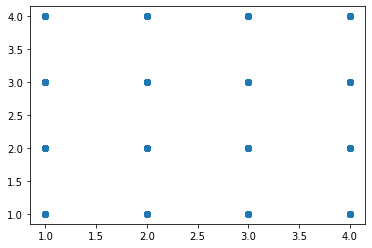

In [26]:
plt.scatter(y_test,y_pred)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Multiomial Naive Bayes



In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
clf = MultinomialNB()
clf.fit(X_train, y_train)  
pred = clf.predict(X_test)

accuracy_score(y_test, pred)

0.3488989101841413

# Heatmap



<AxesSubplot:title={'center':'Correlation between feature columns'}>

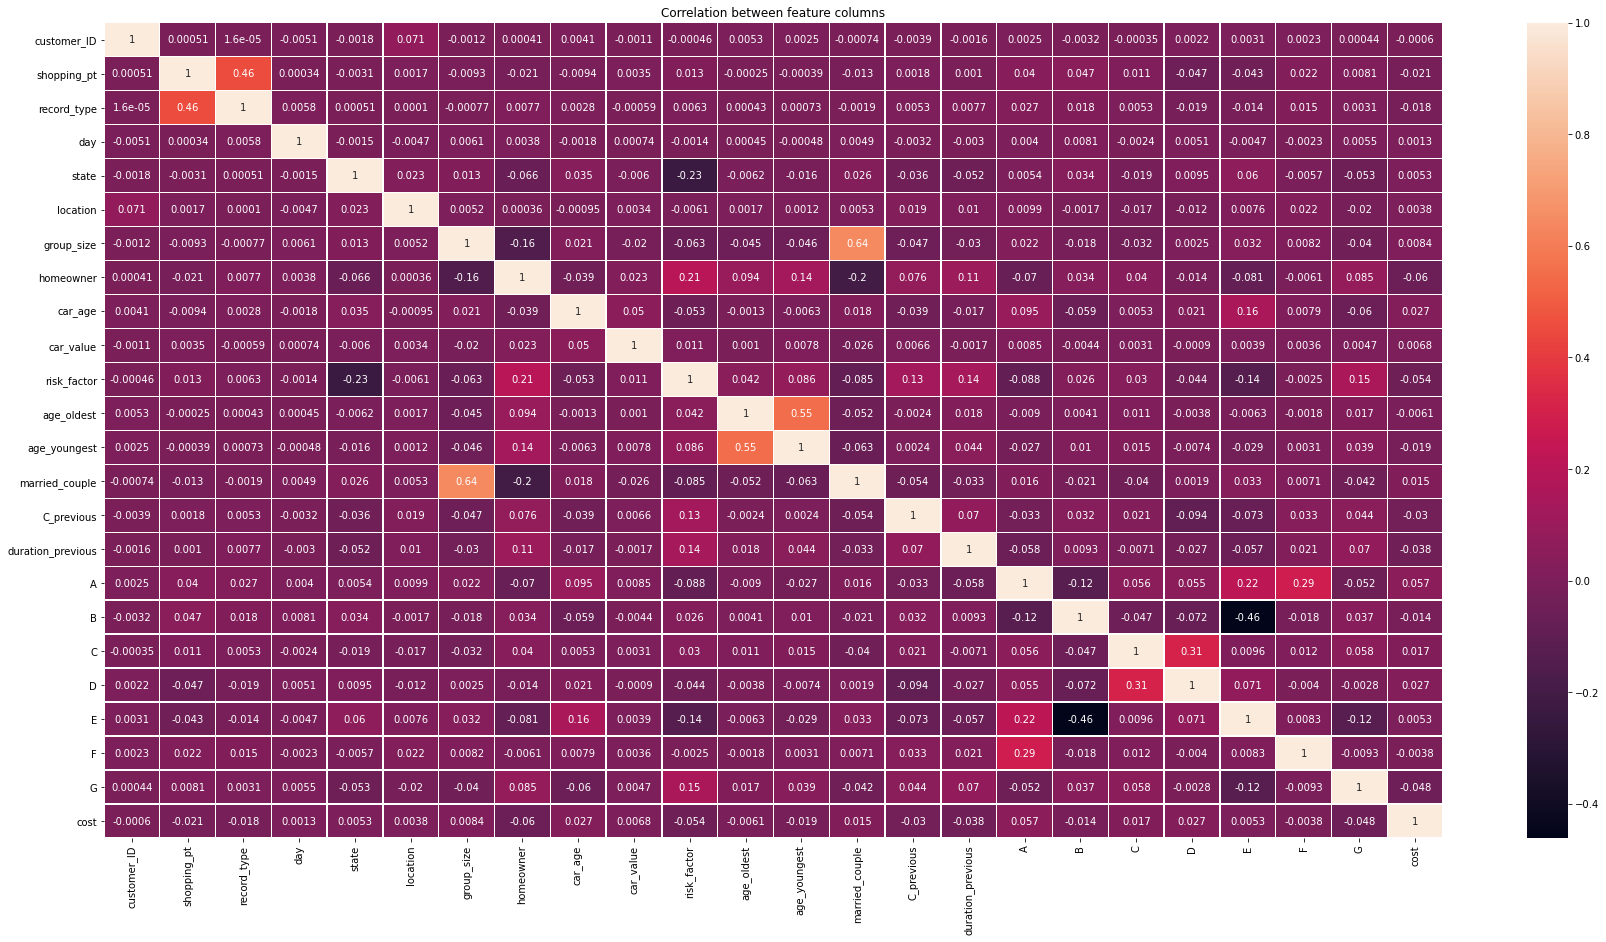

In [29]:
plt.figure(figsize=(30,15)) 
plt.title('Correlation between feature columns') 
corr = scaled_df.apply(lambda x: x.factorize()[0]).corr()
sn.heatmap(corr,annot=True,linewidth=.5)

# Random Classifier


In [30]:
seed=0
rf=RandomForestClassifier(random_state=seed)
rf.fit(X_train, y_train)  
#print(clf.feature_importances_)
pred = rf.predict(X_test)
accuracy_score(y_test, pred)

0.9536039083051484

In [31]:
# Confusion matrix 
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95     19911
         2.0       0.98      0.91      0.94     19403
         3.0       0.94      0.99      0.96     71504
         4.0       0.99      0.87      0.93     22232

    accuracy                           0.95    133050
   macro avg       0.96      0.93      0.95    133050
weighted avg       0.95      0.95      0.95    133050

[[19024   124   733    30]
 [  463 17637  1240    63]
 [  368   209 70777   150]
 [   84    87  2622 19439]]


In [32]:
important_features_dict = {}
for x,i in enumerate(rf.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print('Most important features: %s' %important_features_list)

Most important features: [9, 22, 0, 4, 10, 11, 7, 14, 8, 3, 21, 13, 20, 17, 1, 15, 18, 16, 6, 5, 19, 12, 2]


In [33]:
important_features_dict

{0: 0.09233272963102028,
 1: 0.022434672497029132,
 2: 0.004685223160613752,
 3: 0.041009744100808446,
 4: 0.09127208546943116,
 5: 0.011819895945778924,
 6: 0.013375044472219808,
 7: 0.0675704861112757,
 8: 0.04269936980384195,
 9: 0.11842609985095195,
 10: 0.08220138199089794,
 11: 0.08096076139501257,
 12: 0.010236318527443743,
 13: 0.025977283110000426,
 14: 0.060253462193288095,
 15: 0.01628301896732347,
 16: 0.014635853376145432,
 17: 0.024579385292081327,
 18: 0.015510489278150859,
 19: 0.01130935061970888,
 20: 0.02583564522140626,
 21: 0.030949903201965206,
 22: 0.09564179578360461}

In [34]:
#Features from Rank 1 to end
df_x_columns=scaled_df.drop(columns =['risk_factor'])
cols = list(df_x_columns.columns)
final_features = []
for i in important_features_list:
  final_features.append(cols[i])
final_features

['car_value',
 'cost',
 'customer_ID',
 'state',
 'age_oldest',
 'age_youngest',
 'homeowner',
 'duration_previous',
 'car_age',
 'day',
 'G',
 'C_previous',
 'F',
 'C',
 'shopping_pt',
 'A',
 'D',
 'B',
 'group_size',
 'location',
 'E',
 'married_couple',
 'record_type']

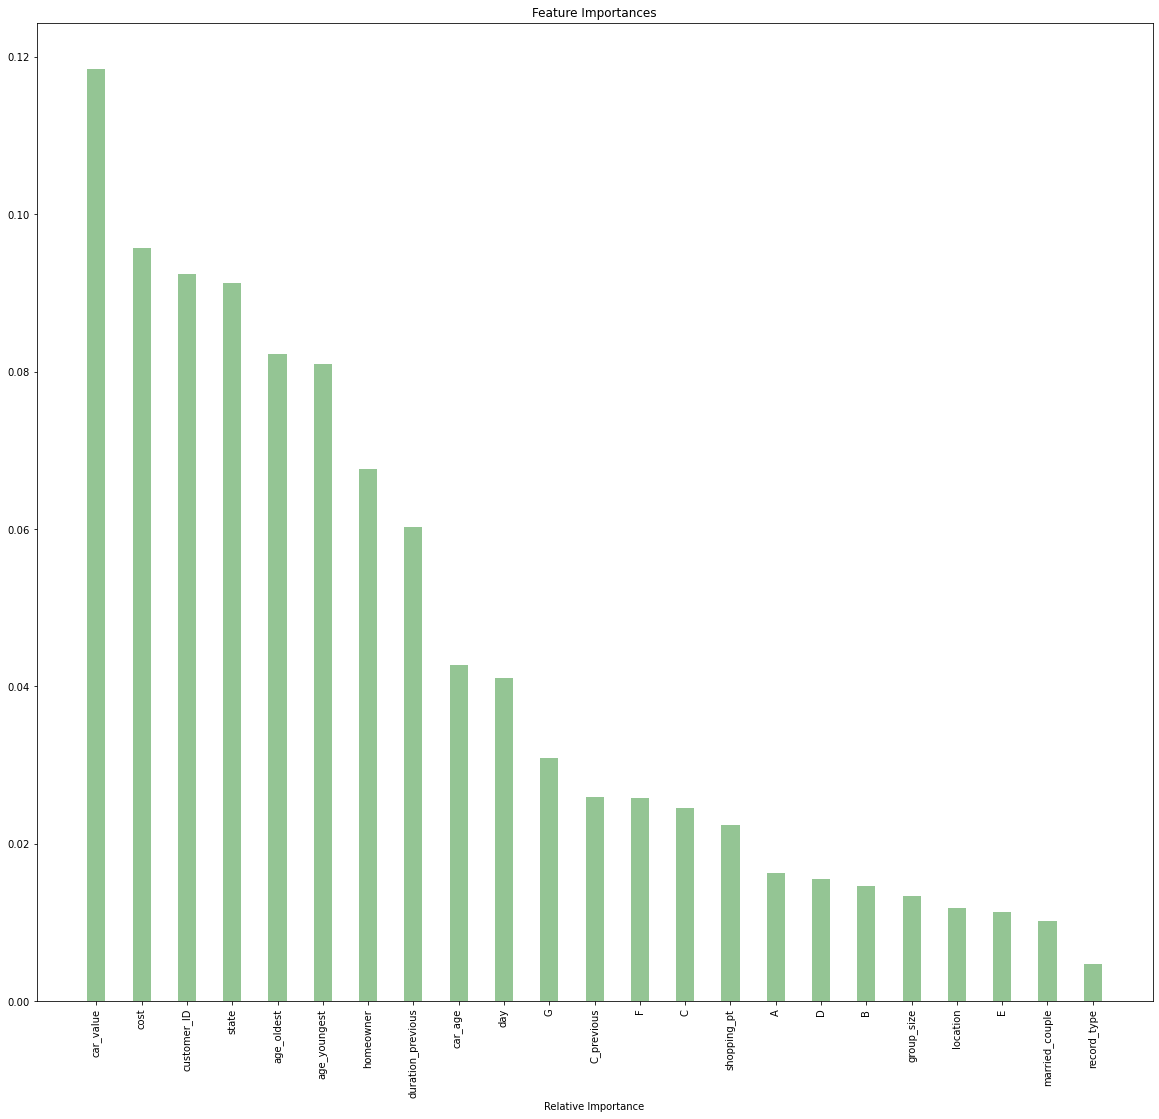

In [35]:
#Plot the importances
importances = rf.feature_importances_
indices = np.argsort(importances)
indices = indices[::-1]
cols = list(df_x_columns.columns)
plt.figure(figsize=(20,18))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='#94c594', align='center',width=0.4)
plt.xticks(range(len(indices)), final_features, rotation ='vertical')
plt.xlabel('Relative Importance')
plt.show()

# Decision Tree

In [36]:
dt=DecisionTreeClassifier(random_state=seed)
dt.fit(X_train, y_train)  
pred = dt.predict(X_test)
accuracy_score(y_test, pred)

0.8958662157083803

In [37]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.89      0.89      0.89     19911
         2.0       0.84      0.85      0.84     19403
         3.0       0.93      0.93      0.93     71504
         4.0       0.84      0.85      0.84     22232

    accuracy                           0.90    133050
   macro avg       0.87      0.88      0.88    133050
weighted avg       0.90      0.90      0.90    133050

[[17622  1039   935   315]
 [ 1012 16484  1345   562]
 [  960  1501 66252  2791]
 [  305   589  2501 18837]]


# Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy_score(y_test, gnb_predictions)



0.5486508831266441

In [40]:
# creating a confusion matrix
print(classification_report(y_test, gnb_predictions))
print(confusion_matrix(y_test, gnb_predictions))
cm = confusion_matrix(y_test, gnb_predictions)
print(cm)

              precision    recall  f1-score   support

         1.0       0.35      0.60      0.44     19911
         2.0       0.26      0.01      0.03     19403
         3.0       0.62      0.85      0.72     71504
         4.0       0.18      0.00      0.00     22232

    accuracy                           0.55    133050
   macro avg       0.35      0.37      0.30    133050
weighted avg       0.45      0.55      0.46    133050

[[11966   260  7684     1]
 [ 7882   278 11235     8]
 [10344   375 60743    42]
 [ 3931   175 18115    11]]
[[11966   260  7684     1]
 [ 7882   278 11235     8]
 [10344   375 60743    42]
 [ 3931   175 18115    11]]


# BCG


In [25]:
bgc = ensemble.BaggingClassifier()

In [26]:
bgc.fit(X_train, y_train)  


0.9350244269071778

In [28]:
pred = bgc.predict(X_test)
print("Bagging Classifier Accuracy: ",accuracy_score(y_test, pred))

Bagging Classifier Accuracy:  0.9350244269071778


# CART


# XGB


In [42]:
!pip install xgboost

In [45]:
import xgboost
from xgboost import XGBClassifier

In [47]:
xgb = XGBClassifier(random_state=seed, subsample = 1.0, silent = False, reg_lambda = 10.0,
                   n_estimators = 100, min_child_weight = 7.0, max_depth = 15, learning_rate = 0.1,
                   gamma = 0.25, colsample_bytree = 0.5, colsample_bylevel = 1.0)
xgb.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9136490041337842

In [49]:
xgb_pred = xgb.predict(X_test)
print("Accuracy of XGBoost: ",accuracy_score(y_test,xgb_pred))

Accuracy of XGBoost:  0.9136490041337842
